In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

# Preprocess
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# Custom CNN (LeNet-style)
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.summary()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test Accuracy:",test_acc)

# Save model
model.save("digit_cnn.h5")


(60000, 28, 28)
(10000, 28, 28)


c:\Users\morsh\anaconda3\envs\cvpr\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9569 - loss: 0.1369 - val_accuracy: 0.9858 - val_loss: 0.0486
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9860 - loss: 0.0445 - val_accuracy: 0.9887 - val_loss: 0.0386
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9901 - loss: 0.0309 - val_accuracy: 0.9887 - val_loss: 0.0370
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9931 - loss: 0.0205 - val_accuracy: 0.9907 - val_loss: 0.0401
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9923 - val_loss: 0.0314
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9959 - loss: 0.0119 - val_accuracy: 0.9925 - val_loss: 0.0372
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0.9883 - val_loss: 0.0449
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9970 - loss: 0

Test Accuracy: 0.9904000163078308


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
CONFIDENCE_THRESHOLD = 0.85
MIN_CONTOUR_AREA = 1500

cap = cv2.VideoCapture(0)
model = tf.keras.models.load_model("digit_cnn.h5")

def preprocess_digit(img):
    h, w = img.shape

    # Make square (MNIST style)
    size = max(h, w)
    square = np.zeros((size, size), dtype=np.uint8)

    y_offset = (size - h) // 2
    x_offset = (size - w) // 2
    square[y_offset:y_offset+h, x_offset:x_offset+w] = img

    # Resize to 28x28
    resized = cv2.resize(square, (28, 28))

    # Normalize
    normalized = resized / 255.0
    return normalized.reshape(1, 28, 28, 1)


while True:
    ret, frame = cap.read()
    if not ret:
        break

    # frame = cv2.flip(frame, 1)  # enable if needed

    x, y, w, h = 100, 100, 300, 300
    roi = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.adaptiveThreshold(
        blur, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    contours, _ = cv2.findContours(
        thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    digit = None

    if contours:
        cnt = max(contours, key=cv2.contourArea)

        if cv2.contourArea(cnt) > MIN_CONTOUR_AREA:
            x2, y2, w2, h2 = cv2.boundingRect(cnt)
            digit_roi = thresh[y2:y2+h2, x2:x2+w2]

            digit_roi = preprocess_digit(digit_roi)

            prediction = model.predict(digit_roi, verbose=0)
            confidence = np.max(prediction)
            predicted_digit = np.argmax(prediction)

            if confidence > CONFIDENCE_THRESHOLD:
                digit = predicted_digit
                cv2.rectangle(
                    roi, (x2, y2), (x2+w2, y2+h2), (255,0,0), 2
                )

    if digit is not None:
        cv2.putText(frame, f"Digit: {digit}", (100,80),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    else:
        cv2.putText(frame, "Show a digit", (100,80),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2)

    cv2.imshow("Digit Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

: 

![Digit Recognition .png](<attachment:Digit Recognition .png>)
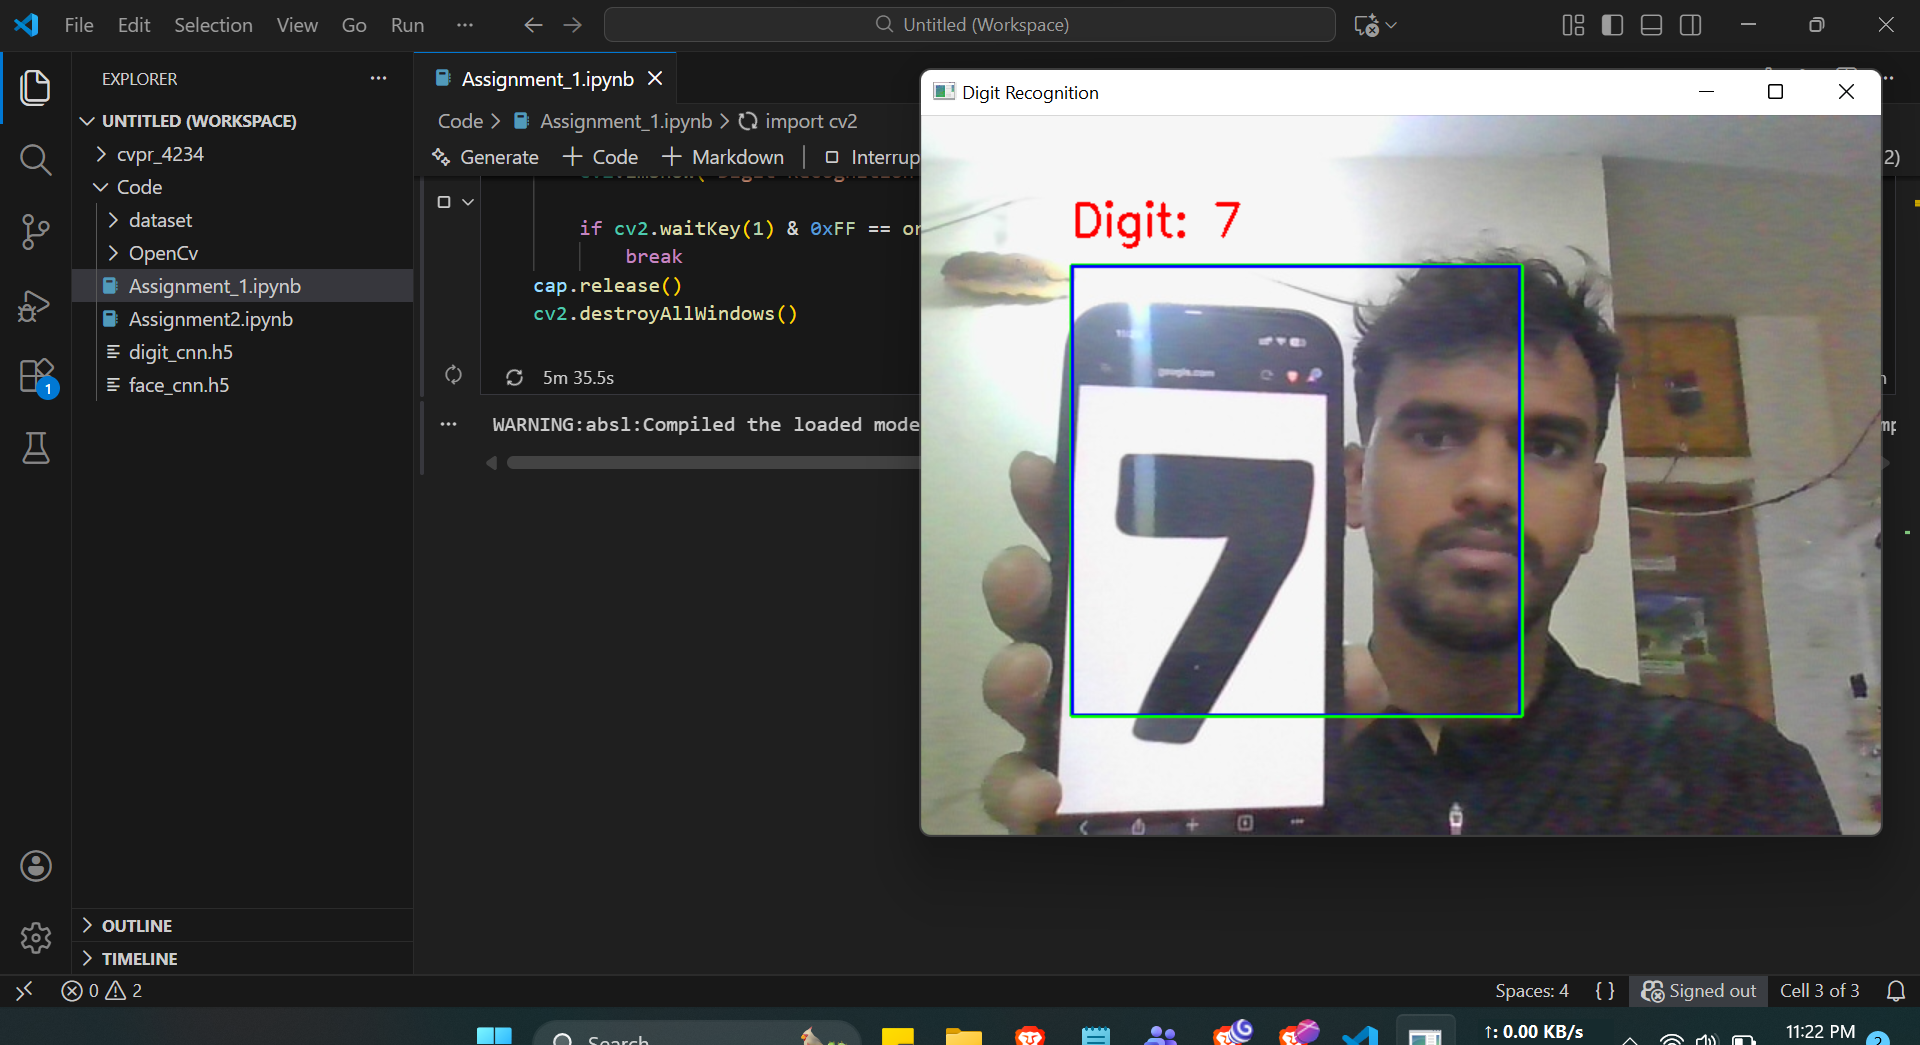